In [1]:
from Packages.Global import loadLabledData , EmojiInformation , Load_Hazm_Normalization
from Packages.TFIDF import findCorrelatedTerms , generateTFIDF_Vectorizer
from Packages.LearningModel import compareAllModels , generateMultinuminalNB , generateSVC

In [2]:
# loading data
myDataFrame = loadLabledData("Datasets/Labeled_Comments.csv")

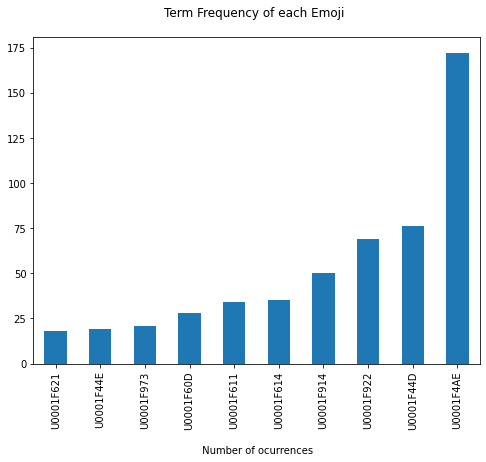

In [3]:
# Show Emoji Information
EmojiInformation (myDataFrame)

In [4]:
# add a col to data frame
myDataFrame['category_id'] = myDataFrame['Label'].factorize()[0]

In [5]:
# Create some dictonaries and dataframe for future use
category_id_df = myDataFrame[['Label', 'category_id']].sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Label']].values)

In [6]:
normalizer , tokenizer , tokens , S_Words = Load_Hazm_Normalization()

In [7]:
# Generate TFIDF Vectorize
tfidf = generateTFIDF_Vectorizer(False, normalizer.normalize, tokens, (1, 2), S_Words  )

In [8]:
#Transform each complaint into a vector
comments = myDataFrame.comment
features = tfidf.fit_transform(comments).toarray()
labels = myDataFrame.category_id

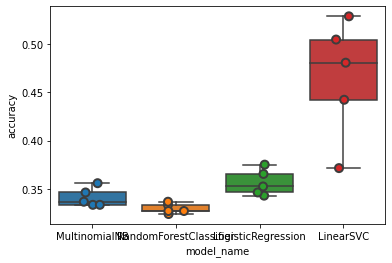

In [9]:
#Compair All Models ( MultinomialNB, LinearSVC, RandomForestClassifier, LogisticRegression )
compareAllModels(features,labels)

In [10]:
# Finding the three most correlated terms with each of the product categories
findCorrelatedTerms(tfidf, features, labels, category_to_id, 3)

# 'U0001F44D':
  . Top unigrams:
       . بخرید
       . حتما
       . بخریدش
  . Top bigrams:
       . حتما بخرید
       . بخرید عالیه
       . خوبه حتما
# 'U0001F44E':
  . Top unigrams:
       . ضعیف
       . دیرشارژمیشه
       . باطریش
  . Top bigrams:
       . بو ضعیف
       . باطریش ضعیفه
       . اسباب بازی
# 'U0001F4AE':
  . Top unigrams:
       . عالیه
       . میکنم
       . بد
  . Top bigrams:
       . پیشنهاد میکنم
       . حتما پیشنهاد
       . حتما بخرید
# 'U0001F60D':
  . Top unigrams:
       . دوسش
       . عاشقش
       . دنیاااااا
  . Top bigrams:
       . دوسش دارم
       . بازی دنیاااااا
       . خودم عاشقش
# 'U0001F611':
  . Top unigrams:
       . موس
       . دکوری
       . می‌خورد
  . Top bigrams:
       . خوبه کار
       . دکوری خوبه
       . سر می‌خورد
# 'U0001F614':
  . Top unigrams:
       . بدرد
       . نخور
       . افتضاح
  . Top bigrams:
       . بدرد نخور
       . افتضاح هست
       . بو نداره
# 'U0001F621':
  . Top unigrams:
       . شکننده
       . سطل
 

In [11]:
# ************************** Multinomial NB ***************************
generateMultinuminalNB(myDataFrame)



*********  MultinominalNB Model Classification Report  ***********


              precision    recall  f1-score   support

           0       0.27      0.28      0.28       181
           1       0.39      0.59      0.47       181
           2       0.26      0.33      0.29       184
           3       0.31      0.19      0.23       185
           4       0.36      0.30      0.32       183
           5       0.25      0.25      0.25       179
           6       0.42      0.50      0.45       182
           7       0.29      0.21      0.24       184
           8       0.32      0.46      0.38       181
           9       0.29      0.30      0.30       178
          10       0.18      0.07      0.10       182

    accuracy                           0.31      2000
   macro avg       0.30      0.31      0.30      2000
weighted avg       0.30      0.31      0.30      2000



(Multinomial) Naive Bayes Labeling  .... 


Comment:  کالا بسیار خوب و عالی هست .. به همه توصیه می کنم
Related emo

In [12]:
# ************************** LinearSVC ***************************
generateSVC( tfidf, myDataFrame, features, labels , False, category_id_df, id_to_category)



*********  SVC Model Classification Report ***********


              precision    recall  f1-score   support

   U0001F60D       0.00      0.00      0.00        21
   U0001F44D       0.82      0.14      0.24        63
   U0001F914       1.00      0.05      0.10        37
   U0001F4AE       0.33      0.98      0.50       137
   U0001F614       0.00      0.00      0.00        27
   U0001F44E       0.00      0.00      0.00        18
   U0001F611       0.00      0.00      0.00        29
   U0001F621       0.00      0.00      0.00        15
   U0001F922       0.50      0.02      0.03        57
   U0001F973       0.00      0.00      0.00        14

    accuracy                           0.35       418
   macro avg       0.27      0.12      0.09       418
weighted avg       0.39      0.35      0.21       418



LinearSVC Model Labeling  .... 


Comment:  کالا بسیار خوب و عالی هست .. به همه توصیه می کنم
Related emoji:  ['U0001F4AE']
